# edge detection

In [66]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r"C:\Users\Helya\Desktop\git\digital image processing\dege ditecktion\AdobeStock_209124760.jpg", cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(img, (3, 3), 0) 

In [67]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

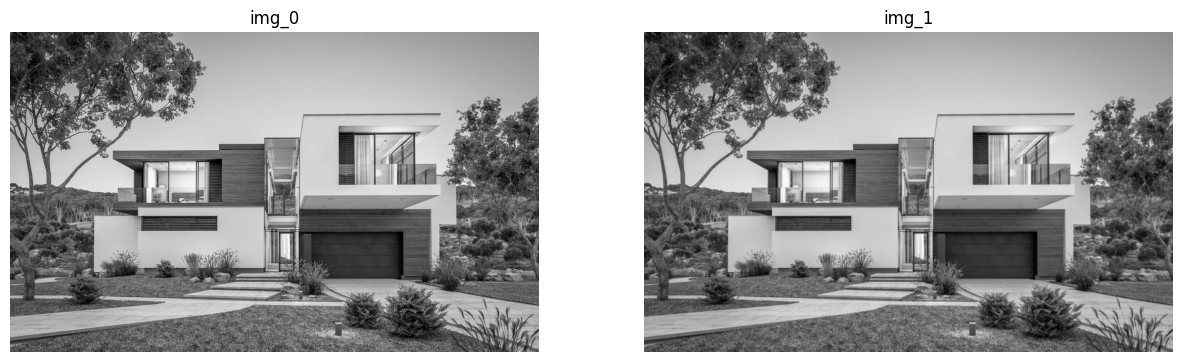

In [68]:
show_mult_img(1, 2, (img, blurred_image))

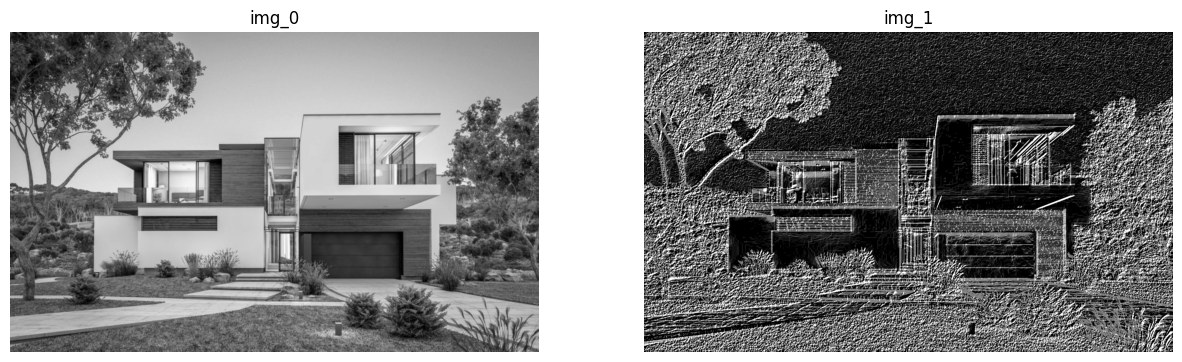

In [69]:
## sobel 
sobelx = cv2.Sobel(src=img, ddepth=-1, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img, ddepth=-1, dx=0, dy=1, ksize=5)
gradient = cv2.addWeighted(np.abs(sobelx), 0.5, np.abs(sobely), 0.5, 0)

show_mult_img(1, 2, (blurred_image, gradient))

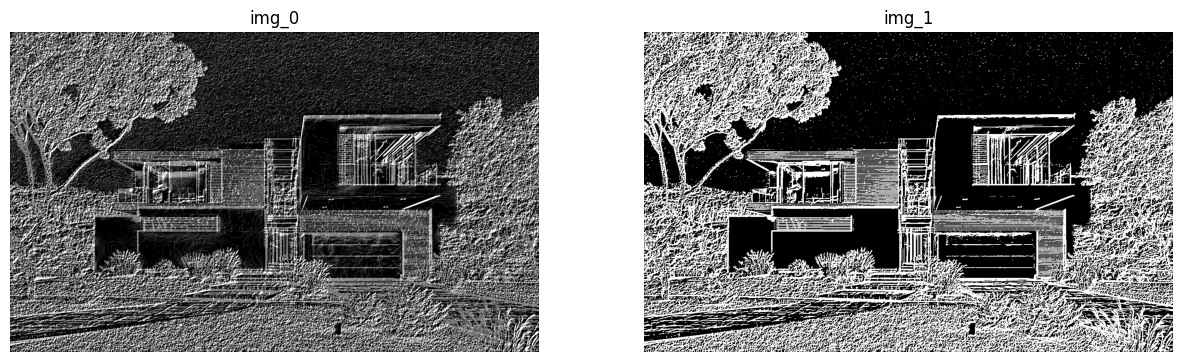

In [70]:
threshold_value = 125
ret, thresh_gradient = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY)
show_mult_img(1, 2, (gradient, thresh_gradient))

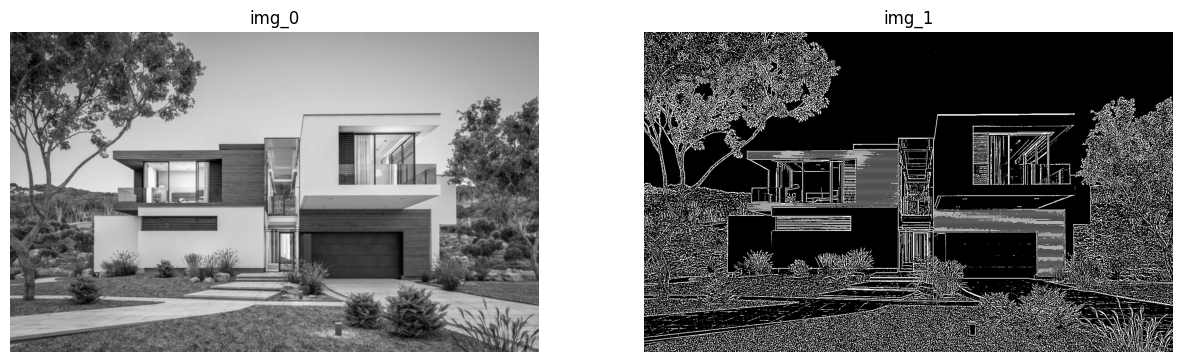

In [71]:
### laplacian
laplacian = cv2.Laplacian(blurred_image, -1)
ret, thresh = cv2.threshold(laplacian, 7, 255, cv2.THRESH_BINARY)

show_mult_img(1, 2, (blurred_image, thresh))

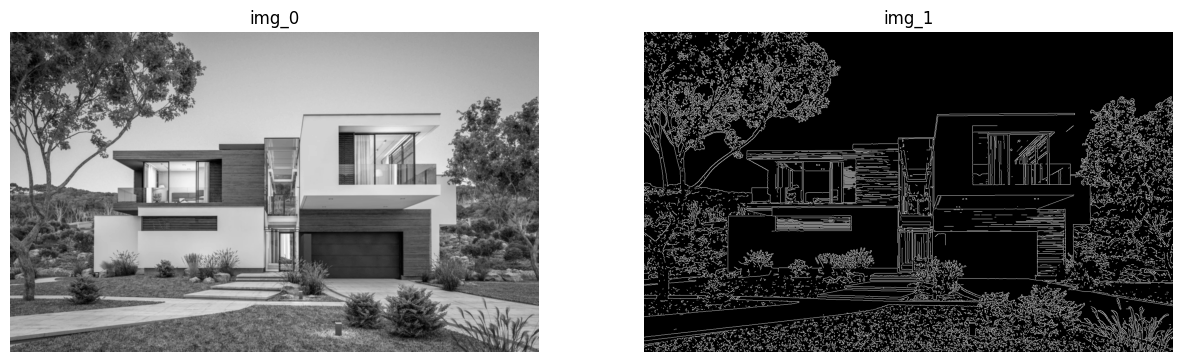

In [72]:
##canny
canny = cv2.Canny(image=blurred_image, threshold1=120, threshold2=150)
show_mult_img(1, 2, (blurred_image, canny))

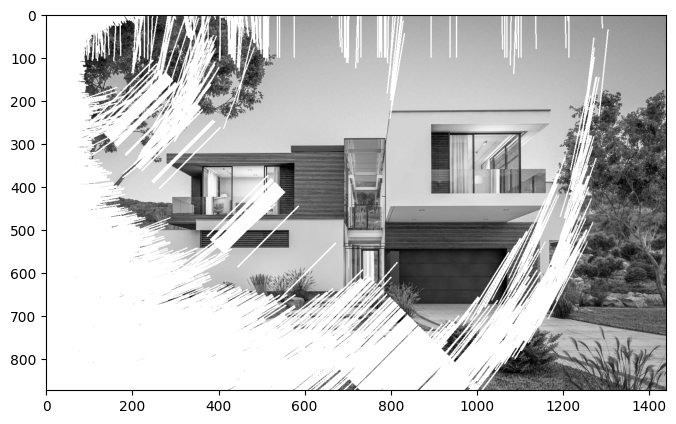

In [73]:
##  Hough transform 
img_2 = img.copy()

lines = cv2.HoughLines(canny, 1, np.pi/180, 150)

for line in lines:
    rho, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + 100*(-b))
    y1 = int(y0 + 100 * (a))
    x2 = int(x0 - 100 *(-b))
    y2 = int(y0 - 100 * a)
       
    cv2.line(img_2, (x1, y1), (x2, y2), (255, 0, 0), 2)

show_img_plt(img_2)
#show_mult_img(1, 2, (blurred_image, img_2))

Hough transform is a good method for detecting edges. But it is not working in the case of this image

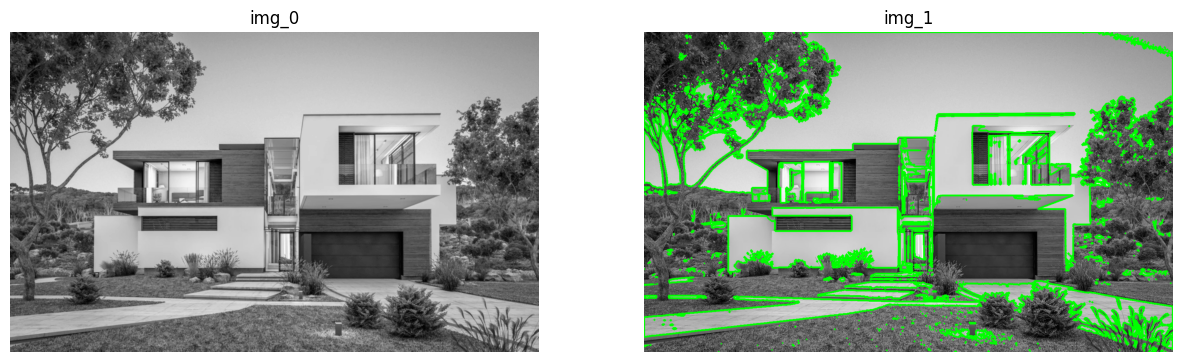

In [90]:
# finding countors with hierarchy
img_3 = img.copy()
img_3 = cv2.cvtColor(img_3, cv2.COLOR_GRAY2BGR)


ret, thresh_binary = cv2.threshold(blurred_image, 150, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img4 = cv2.drawContours(img_3, contours, -1, (0, 255, 0), 4)

show_mult_img(1, 2, (blurred_image, img4))
